<a href="https://colab.research.google.com/github/kishusingh62/dlp1/blob/main/5th_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 103ms/step - accuracy: 0.8052 - loss: 0.6024 - val_accuracy: 0.9772 - val_loss: 0.0714
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.9613 - loss: 0.1245 - val_accuracy: 0.9862 - val_loss: 0.0507
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 102ms/step - accuracy: 0.9741 - loss: 0.0853 - val_accuracy: 0.9884 - val_loss: 0.0412
313/313 - 3s - 11ms/step - accuracy: 0.9893 - loss: 0.0333
Test Accuracy: 0.99
Image loaded successfully with shape: (300, 221)


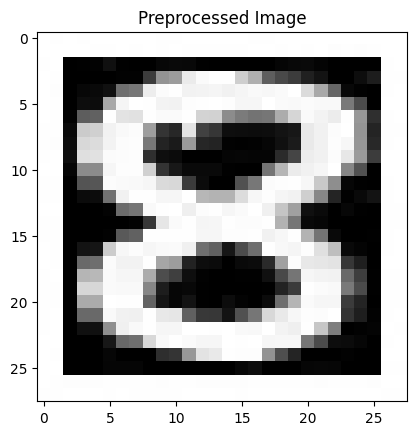

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Prediction probabilities: [[2.0434052e-06 2.1949470e-05 4.0676040e-03 7.6006912e-02 8.4925759e-06
  1.7545769e-01 2.7110742e-02 4.7982048e-06 7.1728086e-01 3.8976017e-05]]


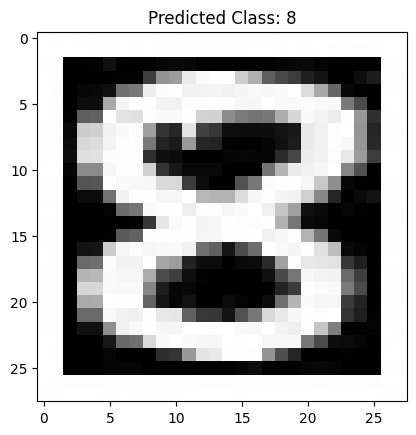

The predicted class for the handwritten image is: 8


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
import cv2
import matplotlib.pyplot as plt
import os

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

def predict_handwritten_image(image_path):
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image from {image_path}")
        return
    print(f"Image loaded successfully with shape: {img.shape}")

    img = cv2.resize(img, (28, 28))
    img = img / 255.0

    img = np.expand_dims(img, axis=(0, -1))

    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.show()

    predictions = model.predict(img)

    print(f"Prediction probabilities: {predictions}")

    predicted_class = np.argmax(predictions, axis=1)[0]

    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

    return predicted_class


image_path = r"/content/Screenshot-from-2021-03-16-10-56-56-221x300.webp"
predicted_class = predict_handwritten_image(image_path)
print(f"The predicted class for the handwritten image is: {predicted_class}")